<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook 4</p></tp>
            <tp><p style="font-size:150%;text-align:center">Búsqueda en espacio de estados (3/3) </p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

## Objetivo

En el notebook anterior solucionamos el problema de las jarras de agua con una función de costo que mide el desperdicio de agua usando el algoritmo `best_first_search`. En este notebook vamos a utilizar dicho algoritmo para hacer búsquedas basadas no solo en costos (llamada `uniform_cost_search`), sino también en funciones heurísticas para mejorar el proceso de búsqueda. Las heurísticas usan información específica sobre el problema para evaluar qué tan cerca está un estado de la solución del problema. Como ejemplo para considerar las heurísticas consideraremos el problema del rompecabezas de ocho piezas, el cual resolveremos mediante los algoritmos `greedy-best-first-search` y $A^*$. 

Adaptado de (Russell & Norvig, 2020), secciones 3.4.2, 3.5.1 y 3.5.2.

## Secciones

Desarrollaremos la explicación de la siguiente manera:

* [Problema del viaje a Rumania](#rumania).
* [Estrategia de búsqueda uniform cost](#uniform).
* [Problema del 8 puzzle](#8puzzle).
* [Comparación de heurísticas](#heuristicas).
* [Estrategia de búsqueda avara](#avara).
* [Estrategia de búsqueda A*](#Astar).
* [Problema del laberinto](#laberinto).
* [Opciones para ahorrar memoria](#memoria).



## El problema del viaje a Rumania <a class="anchor" id="rumania"></a>

Imagine que usted viaja a Rumania y que desconoce por completo el país, pero tiene a mano un mapa de los caminos, que le indica las longitudes en kilómetros, como el siguiente:

<img src="./imagenes/Rumania.png" width="500px"/>

El problema consiste en, dada una ciudad de salida y una ciudad de llegada, encontrar el camino más corto.

**Ejercicio 1:**

Complete la definición formal del problema del viaje a Rumania:    

* **Estado inicial**: 
Una ciudad 

* **Posibles acciones**: 
Los vecinos de la ciudad.

* **Función de transiciones**: 
Ir a una de dichas ciudades

* **Prueba de satisfacción del objetivo**: 
Ciudad actual == Ciudad llegada

* **Función de costo**: 
La distancia

---

Podemos importar este problema desde nuestra librería `ambientes`:

In [1]:
from ambientes import ViajeRumania
from busqueda import *

Supongamos que nuestro problema es ir desde Sibiu hasta Bucharest. Entonces creamos el problema así:

In [2]:
viaje = ViajeRumania('Sibiu', 'Bucharest')

Observe que el problema tiene un atributo de rutas, que podemos visualizar así:

In [3]:
viaje.rutas

{'Oradea': {'Zerind': 71, 'Sibiu': 151},
 'Zerind': {'Arad': 75, 'Oradea': 71},
 'Arad': {'Timisoara': 118, 'Sibiu': 140, 'Zerind': 71},
 'Timisoara': {'Lugoj': 111, 'Arad': 118},
 'Lugoj': {'Mehadia': 70, 'Timisoara': 111},
 'Mehadia': {'Drobeta': 75, 'Lugoj': 70},
 'Drobeta': {'Craiova': 120, 'Mehadia': 75},
 'Sibiu': {'Fagaras': 99, 'Rimnicu Vilcea': 80, 'Arad': 140, 'Oradea': 151},
 'Rimnicu Vilcea': {'Craiova': 146, 'Pitesti': 97, 'Sibiu': 80},
 'Craiova': {'Pitesti': 138, 'Drobeta': 120, 'Rimnicu Vilcea': 146},
 'Fagaras': {'Bucharest': 211, 'Sibiu': 99},
 'Pitesti': {'Bucharest': 101, 'Craiova': 138, 'Rimnicu Vilcea': 97},
 'Bucharest': {'Giurgiu': 90, 'Urziceni': 85, 'Fagaras': 211, 'Pitesti': 101},
 'Giurgiu': {'Bucharest': 90},
 'Urziceni': {'Vaslui': 142, 'Hirsova': 98, 'Bucharest': 85},
 'Vaslui': {'Iasi': 92, 'Urziceni': 142},
 'Iasi': {'Neamt': 87, 'Vaslui': 92},
 'Neamt': {'Iasi': 87},
 'Hirsova': {'Eforie': 86, 'Urziceni': 98},
 'Eforie': {'Hirsova': 86}}

Este atributo se utiliza tanto para encontrar las acciones aplicables como para determinar los costos de ir de una ciudad a una ciudad vecina.

**Ejercicio 2:**

A mano, encuentre el camino más corto desde Sibiu a Bucharest. Cree una lista con los nodos en dicho camino y encuentre su atributo `costo_camino`.

In [4]:
n = Nodo(viaje.estado_inicial,None,None,0,viaje.estado_inicial)
n1 = nodo_hijo(viaje,n,'Rimnicu Vilcea')
n2 = nodo_hijo(viaje,n1,'Pitesti')
n3 = nodo_hijo(viaje,n2,'Bucharest')
print(f"los KM son {n3.costo_camino}")

los KM son 278


---

**Ejercicio 3:**

Desde la librería `busqueda` importe las funciones `depth_first_search` y `breadth_first_search`. Utilice ambos métodos para solucionar el problema y encuentre el kilometraje de la solución dada por cada uno de estos métodos. ¿Alguna se parece a la solución encontrada a mano?

In [5]:
f = breadth_first_search(viaje)
if f:
    print(f"Utilizando depth_first_search se llega a la solución con costo {f.costo_camino}")
else:
    print(f"pailas")

Utilizando depth_first_search se llega a la solución con costo 310


In [6]:
f = depth_first_search(viaje)
if f:
    print(f"Utilizando depth_first_search se llega a la solución con costo {f.costo_camino}")
else:
    print(f"pailas")

Utilizando depth_first_search se llega a la solución con costo 1135


---

## Uniform-cost search (o algoritmo de Dijkstra) <a class="anchor" id="uniform"></a>

En el notebook anterior solucionamos el problema de las jarras de agua con una función de costo que mide el desperdicio de agua. Al realizar una búsqueda en un espacio de estados usando una función de costo, como `desperdicio`, se dice que se está realizando una búsqueda de costo uniforme. Sí, sí, así es. Sólo cambiando la función de costo se cambia el nombre del algoritmo. Extraño, pero cierto. Lo que caracteriza a la búsqueda de costo uniforme es que la función de costo siempre crece a medida que aumentamos la longitud del camino. 

**Ejercicio 4:**

Ahora encuentre la solución óptima del viaje a Rumania mediante el algoritmo de costo uniforme (que es el mismo `best_first_search`; observe que no necesita sino poner un argumento, porque usaremos el costo que viene por defecto en el problema).

In [7]:
f = best_first_search(viaje)
if f:
    print(f"Utilizando best_first_search se llega a la solución con costo {f.costo_camino}")
else:
    print(f"pailas")

Utilizando best_first_search se llega a la solución con costo 278


---

**Cuando el orden de los factores sí altera el producto**

Veremos ahora un ejemplo que nos permite justificar por qué la verificación de la prueba de satisfacción de objetivo se realiza al explorar la frontera, no al expandir un nodo. Observe que en el notebook 2 realizábamos esta verificación al expandir un nodo. Si encontrábamos una solución, estaba bien y concluíamos la búsqueda. En el algoritmo `best_first_search` somos un poco más cuidadosos y no verificamos sino hasta expandir la frontera de acuerdo a la lista prioritaria. La razón de esto podemos verla con un ejemplo.

Consideremos el problema de ir desde Sibiu a Bucharest.

<img src="./imagenes/Sibiu2Bucharest.png" width="280px"/>

Los sucesores de Sibiu son Rimnicu Vilcea y Fagaras, con un coste de 80 y 99, respectivamente. El nodo de menor costo, Rimnicu Vilcea, se amplía a continuación, añadiendo Pitesti con un costo de 80+97=177. El nodo de menor costo es ahora Fagaras, por lo que se amplía, añadiendo Bucarest con un costo de 99 + 211 = 310. Bucarest es el objetivo, pero el algoritmo sólo comprueba los objetivos cuando expande un nodo, no cuando genera un nodo, por lo que aún no ha detectado que éste es un camino hacia el objetivo.

El algoritmo continúa, eligiendo Pitesti para la siguiente expansión y añadiendo un segundo camino a Bucarest con un costo de 80 + 97 + 101 = 278. Tiene un costo menor, por lo que sustituye a la ruta anterior alcanzada y se añade a la frontera. Resulta que este nodo tiene ahora el costo más bajo, por lo que se considera el siguiente, se comprueba que es una meta y se devuelve. Nótese que si hubiéramos comprobado la existencia de un objetivo al generar un nodo en lugar de al ampliar el nodo de menor costo, habríamos devuelto un camino de mayor costo (el que pasa por Fagaras).



## El problema del rompecabezas de 8 piezas <a class="anchor" id="8puzzle"></a>

Considere ocho piezas cuadradas, cada una con un número del 1 al 8. Estas piezas se ponen en una caja cuadrada  formando un rompecabezas, de tal manera que queda un espacio del mismo tamaño que las piezas, como en la figura siguiente:

<img src="./imagenes/puzzle.png" width="350px"/>

Las piezas adyacentes al espacio pueden desplazarse desde su posición hasta ocupar el espacio vacío, de tal manera que es posible cambiar el orden de todas las piezas. El problema consiste en, dada una posición del rompecabezas, encontrar una manera de mover las piezas para lograr otra posición deseada.

La descripción formal del problema es como sigue:

* **Estado inicial**: Un rompezabezas donde las piezas están dispuestas aleatoriamente.

* **Posibles acciones**: Mover una ficha al espacio vacío. En cada configuración hay maximo cuatro fichas que pueden moverse al espacio vacío (cuando este está en el centro). Usualmente solo pueden moverse tres fichas o solo dos, cuando el espacio vacío está en una esquina. 

* **Función de transiciones**: Mover la ficha y obtener el tablero correspondiente.

* **Prueba de satisfacción del objetivo**: El tablero está organizado como sigue:

<img src="./imagenes/objetivo.png" width="350px"/>

* **Función de costo**: Cada acción cuesta 1 punto.

Observe que podemos usar el método `pintar_camino` para visualizar el movimiento correspondiente de las piezas:

In [8]:
from ambientes import Rompecabezas
from random import choice
import numpy as np

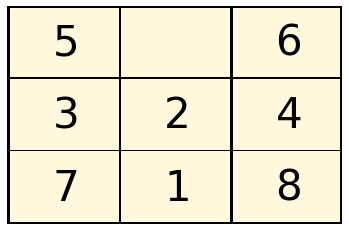

In [9]:
puz = Rompecabezas()
s = puz.estado_inicial
a = choice(puz.acciones_aplicables(s))
puz.pintar_camino([a])

In [10]:
print(a)


((2, 1), (2, 2))


El problema del rompecabezas es difícil, y usualmente le cuesta un buen tiempo a los métodos de `breadth_first_search` y `depth_first_search` converger en una solución. Si usted es curioso, trate de usar uno de estos métodos para resolver el problema. El resultado que usted debe obtener es una celda que se queda corriendo hasta que se agota la paciencia.

El método `uniform_cost_search`, que usa la función de costos usual en el algoritmo `best_first_search`, es mucho más eficiente que los anteriores, pero aún puede mejorarse, como lo veremos en un momento. Por ahora, el ejercicio es resolver el problema del rompecabezas mediante `best_first_search` y la siguiente función de costo:

In [11]:
def costo_accion(self, estado, accion):
    return 1


<AxesSubplot:>

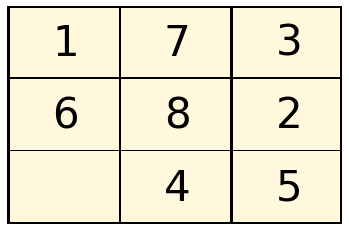

In [12]:
setattr(Rompecabezas,"costo",costo_accion)
puz = Rompecabezas()
S = np.matrix([[0, 6, 1], [4, 8, 7], [5, 2, 3]])
puz.estado_inicial = S
puz.pintar_estado(puz.estado_inicial)

In [13]:
%%time
l = best_first_search(puz)
if l is not None:
    camino = solucion(l)
    print("La solución encontrada es: ", camino)
    print("La cantidad de movimientos es: ", len(camino))
else:
    print("No hay solución!")

La solución encontrada es:  [((0, 1), (0, 0)), ((1, 1), (0, 1)), ((2, 1), (1, 1)), ((2, 0), (2, 1)), ((1, 0), (2, 0)), ((1, 1), (1, 0)), ((2, 1), (1, 1)), ((2, 2), (2, 1)), ((1, 2), (2, 2)), ((0, 2), (1, 2)), ((0, 1), (0, 2)), ((0, 0), (0, 1)), ((1, 0), (0, 0)), ((2, 0), (1, 0)), ((2, 1), (2, 0)), ((1, 1), (2, 1)), ((0, 1), (1, 1)), ((0, 0), (0, 1)), ((1, 0), (0, 0)), ((2, 0), (1, 0))]
La cantidad de movimientos es:  20
CPU times: user 1min 30s, sys: 1.05 s, total: 1min 31s
Wall time: 1min 34s


Observe que, en mi computador, el algoritmo con costo uniforme tarda más de 33 segundos en converger a una solución.

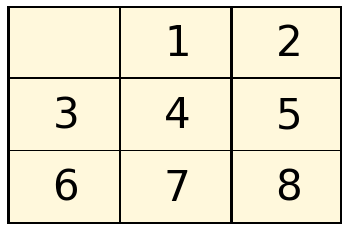

In [14]:
puz.pintar_camino(camino)

## Funciones heurísticas <a class="anchor" id="heuristicas"></a>

Las heurísticas son reglas de comportamiento que aprovechan el conocimiento específico sobre ciertos problemas. El problema del rompecabezas nos permite explicar esto mejor. Podemos evaluar una especie de distancia entre un estado dado y el estado objetivo mediante el conteo de piezas que no se encuentran en el lugar objetivo. Por ejemplo, considere el siguiente tablero:

<AxesSubplot:>

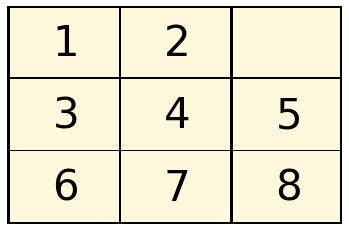

In [15]:
objetivo = puz.objetivo
a = puz.acciones_aplicables(objetivo)[1]
s = puz.transicion(objetivo, a)
a = puz.acciones_aplicables(s)[1]
s = puz.transicion(s, a)
puz.pintar_estado(s)

En este tablero hay dos piezas que no están en la posición objetivo, a saber, el 1 y el 2. Por lo tanto, la función heurística `piezas_mal_puestas` debe devolver el valor 2.

**Ejercicio 6:**

Implemente la función `piezas_mal_puestas`, la cual recibe un estado `s` y una acción `a` y devuelve el valor de la heurística discutida anteriormente, aplicada sobre el estado resultado de aplicar `a` en el estado `s`.

Escriba y verifique su código con la siguiente celda:

In [16]:
def piezas_mal_puestas(self, estado, accion):
    return np.count_nonzero(self.objetivo - estado)

setattr(Rompecabezas,"costo",piezas_mal_puestas)
puz = Rompecabezas()
objetivo = puz.objetivo
a = puz.acciones_aplicables(objetivo)[1]
s = puz.transicion(objetivo, a)
a = puz.acciones_aplicables(s)[1]
puz.costo(s, a)

2

El output de la celda debe ser el valor 2.

---

Otra heurística para el problema del rompecabezas es el siguiente. La distancia entre un estado y el objetivo se mide como la suma de las distancias entre cada pieza y su lugar objetivo. Esta última distancia se mide como la distancia del taxista, es decir, la suma de las distancias verticales y horizontales. Por ejemplo, suponga el siguiente estado:

<AxesSubplot:>

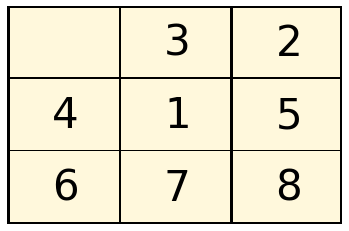

In [17]:
objetivo = puz.objetivo
a = puz.acciones_aplicables(objetivo)[0]
s = puz.transicion(objetivo, a)
a = puz.acciones_aplicables(s)[2]
s = puz.transicion(s, a)
a = puz.acciones_aplicables(s)[1]
s = puz.transicion(s, a)
a = puz.acciones_aplicables(s)[2]
s = puz.transicion(s, a)
puz.pintar_estado(s)

Observe que el 1 está a una casilla de su lugar (una abajo), el cuatro está a una casilla de su lugar (una a la izquierda) y el 3 está a dos casillas de su lugar (una arriba y una a la izquierda. El valor de la heurística `manhattan` debe ser 1 + 1 + 2 = 4. 

**Ejercicio 7:**

Implemente la función `manhattan`, la cual recibe un estado `s` y una acción `a` y devuelve el valor de la heurística discutida anteriormente, aplicada sobre el estado resultado de aplicar `a` en el estado `s`.

Escriba y verifique su código con la siguiente celda:

In [18]:
def manhattan(self, estado, accion):
    
    b = (self.objetivo - estado)
    i_0, i_n0 = b.nonzero()
    t = 0
    
    for i in i_n0:
        m = estado.item(i)
        e1 = np.where(self.objetivo == m)
        e2 = np.where(estado == m)

        t += np.abs(e1[0]-e2[0]) + np.abs(e1[1] - e2[1]) 
    
    return t[0]
            
    
    

setattr(Rompecabezas,"costo",manhattan)
puz = Rompecabezas()
objetivo = puz.objetivo
a = puz.acciones_aplicables(objetivo)[0]
s = puz.transicion(objetivo, a)
a = puz.acciones_aplicables(s)[2]
s = puz.transicion(s, a)
a = puz.acciones_aplicables(s)[1]
s = puz.transicion(s, a)
a = puz.acciones_aplicables(s)[2]
puz.costo(s, a)

4

El output de la celda debe ser el valor 4.

---

## Búsqueda avara <a class="anchor" id="avara"></a>



Al ordenar los nodos explorados mediante una función heurística, lo que se busca es explorar primero aquel nodo que se acerque más al objetivo. Observe que la búsqueda mediante la heurística `piezas_mal_puestas` es mucho más rápida que la de costo uniforme que examinamos anteriormente. 

<AxesSubplot:>

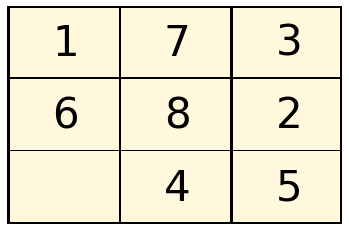

In [19]:
setattr(Rompecabezas,"costo",piezas_mal_puestas)
puz = Rompecabezas()
S = np.matrix([[0, 6, 1], [4, 8, 7], [5, 2, 3]])
puz.estado_inicial = S
puz.pintar_estado(puz.estado_inicial)

In [20]:
%%time
l = best_first_search(puz)
if l is not None:
    camino = solucion(l)
    print("La solución encontrada es: ", camino)
    print("La cantidad de movimientos es: ", len(camino))
else:
    print("No hay solución!")

La solución encontrada es:  [((0, 1), (0, 0)), ((1, 1), (0, 1)), ((1, 0), (1, 1)), ((2, 0), (1, 0)), ((2, 1), (2, 0)), ((2, 2), (2, 1)), ((1, 2), (2, 2)), ((0, 2), (1, 2)), ((0, 1), (0, 2)), ((1, 1), (0, 1)), ((1, 0), (1, 1)), ((2, 0), (1, 0)), ((2, 1), (2, 0)), ((1, 1), (2, 1)), ((1, 0), (1, 1)), ((0, 0), (1, 0)), ((0, 1), (0, 0)), ((1, 1), (0, 1)), ((1, 0), (1, 1)), ((2, 0), (1, 0))]
La cantidad de movimientos es:  20
CPU times: user 25.2 s, sys: 295 ms, total: 25.5 s
Wall time: 25.7 s


Observe que, en mi computador, la búsqueda avara usando la heurística `piezas_mal_puestas` toma solo 5 segundos en converger a una solución, en contraste con los 33 segundos de la búsqueda de costo uniforme.

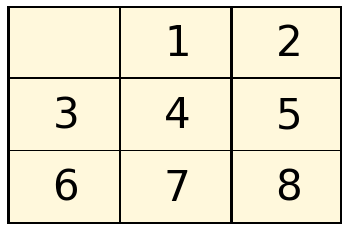

In [21]:
puz.pintar_camino(camino)

**Ejercicio 8:**

Encuentre el tiempo que toma encontrar una solución mediante la búsqueda avara que usa la heurística `manhattan`. ¿Cuál es más rápida? ¿Por qué?

<AxesSubplot:>

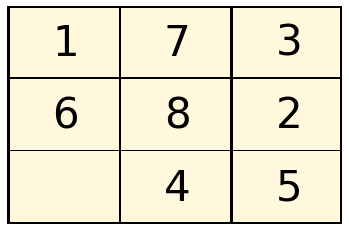

In [22]:
setattr(Rompecabezas,"costo",manhattan)
puz = Rompecabezas()
S = np.matrix([[0, 6, 1], [4, 8, 7], [5, 2, 3]])
puz.estado_inicial = S
puz.pintar_estado(puz.estado_inicial)

In [23]:
%%time
l = best_first_search(puz)
if l is not None:
    camino = solucion(l)
    print("La solución encontrada es: ", camino)
    print("La cantidad de movimientos es: ", len(camino))
else:
    print("No hay solución!")

La solución encontrada es:  [((1, 0), (0, 0)), ((2, 0), (1, 0)), ((2, 1), (2, 0)), ((2, 2), (2, 1)), ((1, 2), (2, 2)), ((1, 1), (1, 2)), ((2, 1), (1, 1)), ((2, 0), (2, 1)), ((1, 0), (2, 0)), ((1, 1), (1, 0)), ((1, 2), (1, 1)), ((0, 2), (1, 2)), ((0, 1), (0, 2)), ((1, 1), (0, 1)), ((2, 1), (1, 1)), ((2, 2), (2, 1)), ((1, 2), (2, 2)), ((0, 2), (1, 2)), ((0, 1), (0, 2)), ((1, 1), (0, 1)), ((1, 2), (1, 1)), ((2, 2), (1, 2)), ((2, 1), (2, 2)), ((2, 0), (2, 1))]
La cantidad de movimientos es:  24
CPU times: user 5.15 s, sys: 50.9 ms, total: 5.2 s
Wall time: 5.43 s


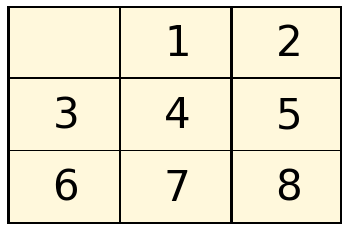

In [24]:
puz.pintar_camino(camino)

---

## A* search  <a class="anchor" id="Astar"></a>

Para concluir los métodos de búsqueda en espacio de estados que exploraremos en este curso, vamos a considerar el método $A^*$. Este es un caso particular de `best_first_search`, en el cual la función de evaluación $f$ es la suma de una función de costo $g$ y una función heurística $h$:

$$f=g+h$$

En el problema del rompecabezas, podemos definir una función de evaluación que sume el costo unitario por acción con la heurística `manhattan`:

In [25]:
def para_A_star(self, estado, accion):
    resultado = self.transicion(estado, accion)
    distancia = 0
    for i in range(1, 9):
        y1, x1 = np.where(resultado == i)
        y2, x2 = np.where(self.objetivo == i)
        distancia += np.abs(x1 - x2) + np.abs(y1 - y2)
    return distancia[0] + 1

<AxesSubplot:>

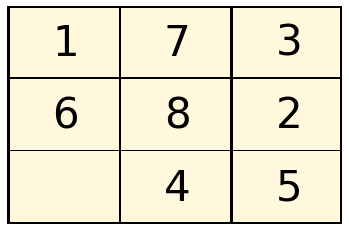

In [26]:
setattr(Rompecabezas,"costo",para_A_star)
puz = Rompecabezas()
S = np.matrix([[0, 6, 1], [4, 8, 7], [5, 2, 3]])
puz.estado_inicial = S
puz.pintar_estado(puz.estado_inicial)

In [27]:
%%time
l = best_first_search(puz)
if l is not None:
    camino = solucion(l)
    print("La solución encontrada es: ", camino)
    print("La cantidad de movimientos es: ", len(camino))
else:
    print("No hay solución!")

La solución encontrada es:  [((0, 1), (0, 0)), ((1, 1), (0, 1)), ((2, 1), (1, 1)), ((2, 2), (2, 1)), ((1, 2), (2, 2)), ((0, 2), (1, 2)), ((0, 1), (0, 2)), ((1, 1), (0, 1)), ((2, 1), (1, 1)), ((2, 0), (2, 1)), ((1, 0), (2, 0)), ((0, 0), (1, 0)), ((0, 1), (0, 0)), ((1, 1), (0, 1)), ((1, 0), (1, 1)), ((2, 0), (1, 0)), ((2, 1), (2, 0)), ((1, 1), (2, 1)), ((0, 1), (1, 1)), ((0, 0), (0, 1)), ((1, 0), (0, 0)), ((1, 1), (1, 0)), ((2, 1), (1, 1)), ((2, 0), (2, 1))]
La cantidad de movimientos es:  24
CPU times: user 7.99 s, sys: 68.2 ms, total: 8.06 s
Wall time: 9.32 s


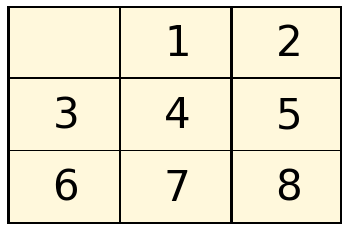

In [28]:
puz.pintar_camino(camino)

---

## En este notebook usted aprendió

* Cómo realizar una búsqueda mediante el método *uniform_cost*, el cual es un caso particular del método general *best_first*.
* Implementar y comparar distintas heurísticas para resolver el problema del rompecabezas.
* Comparar los tiempos y la optimalidad de la respuesta de los cuatro métodos de búsqueda estudiados.